## List the files in your working directory
Make sure the "sc-landscape-human-liver-10XV2.loom" is in the working directory

In [1]:
list.files()

[1] "Bioconductor_to_Seurat.ipynb"        "Conversion.ipynb"                   
 [3] "HCA_Bioconductor.ipynb"              "HCA_SCANPY_deprecated.ipynb"        
 [5] "HCA_Seurat.ipynb"                    "Liver_loom.rds"                     
 [7] "liver_project.h5ad"                  "liver_seurat.rds"                   
 [9] "Loom_to_Seurat_Conversion.ipynb"     "reformatted_loom.rds"               
[11] "sc-landscape-human-liver-10XV2.loom" "Scanpy.ipynb"                       
[13] "trial_liver.h5ad"

## Install the sceasy package
The code below installs the sceasy package following instructions in readme: https://github.com/cellgeni/sceasy. However, it does not use the conda option for installing anndata and loompy. Anndata was already installed lcoally and loompy is installed using the `system()` command below.

In [2]:
devtools::install_github("cellgeni/sceasy")

Skipping install of 'sceasy' from a github remote, the SHA1 (f8f0628a) has not changed since last install.
  Use `force = TRUE` to force installation



In [3]:
BiocManager::install(c("LoomExperiment", "SingleCellExperiment"))

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'LoomExperiment', 'SingleCellExperiment'

Old packages: 'cli', 'patchwork', 'AnnotationHub', 'BiocGenerics',
  'BiocManager', 'bitops', 'boot', 'brio', 'broom', 'cachem', 'callr',
  'caTools', 'cluster', 'cpp11', 'data.table', 'dbplyr', 'DelayedArray',
  'deldir', 'desc', 'DESeq2', 'devtools', 'diffobj', 'dplyr', 'DT',
  'ensembldb', 'ExperimentHub', 'farver', 'formatR', 'gargle', 'GenomeInfoDb',
  'GenomicFeatures', 'gert', 'gh', 'googleAuthR', 'haven', 'highr', 'httpuv',
  'isoband', 'jquerylib', 'knitr', 'later', 'lifecycle', 'lubridate', 'MASS',
  'mgcv', 'mime', 'parallelly', 'pillar', 'pkgload', 'processx', 'promises',
  'ps', 'RcppArmadillo', 'RCurl', 'remotes', 'reprex', 'reticulate',
  'rmarkdown', 'RSQLite', 'rsvd', 'rvest', 'scran', 'Seurat', 'spatstat',
  'spatstat.data', 'spatstat.utils', 'survival', 'testthat', 'tibble', 'tidyr',
  'tidyverse', 'tinytex', 'utf8', 'vctrs', 'viridis

In [4]:
install.packages('reticulate')

Installing package into ‘/home/jupyter-user/notebooks/packages’
(as ‘lib’ is unspecified)



In [5]:
system('pip install -U loompy', intern=FALSE)

## Load the libraries

In [6]:
library(sceasy)
library(reticulate)

Loading required package: reticulate



In [7]:
loompy <- reticulate::import('loompy')

## Convert the Loom to AnnData with sceasy
This codes uses the sc-landscape-human-liver-10XV2.loom file as input and creates an output h5ad file called trial_liver.h5ad.

In [8]:
#takes time
sceasy::convertFormat('sc-landscape-human-liver-10XV2.loom', from="loom", to="anndata",
                       outFile='trial_liver.h5ad')

AnnData object with n_obs × n_vars = 332497 × 58347
    obs: 'cell_barcode_fraction_bases_above_30_mean', 'cell_barcode_fraction_bases_above_30_variance', 'cell_names', 'emptydrops_FDR', 'emptydrops_IsCell', 'emptydrops_Limited', 'emptydrops_LogProb', 'emptydrops_PValue', 'emptydrops_Total', 'fragments_per_molecule', 'fragments_with_single_read_evidence', 'genes_detected_multiple_observations', 'genomic_read_quality_mean', 'genomic_read_quality_variance', 'genomic_reads_fraction_bases_quality_above_30_mean', 'genomic_reads_fraction_bases_quality_above_30_variance', 'input_id', 'molecule_barcode_fraction_bases_above_30_mean', 'molecule_barcode_fraction_bases_above_30_variance', 'molecules_with_single_read_evidence', 'n_fragments', 'n_genes', 'n_mitochondrial_genes', 'n_mitochondrial_molecules', 'n_molecules', 'n_reads', 'pct_mitochondrial_molecules', 'perfect_cell_barcodes', 'perfect_molecule_barcodes', 'reads_mapped_exonic', 'reads_mapped_intergenic', 'reads_mapped_intronic', 'reads_ma

## Sanity check
Make sure the trial_liver.h5ad is now in the working directory by listing the files.

In [9]:
list.files()

[1] "Bioconductor_to_Seurat.ipynb"        "Conversion.ipynb"                   
 [3] "HCA_Bioconductor.ipynb"              "HCA_SCANPY_deprecated.ipynb"        
 [5] "HCA_Seurat.ipynb"                    "Liver_loom.rds"                     
 [7] "liver_project.h5ad"                  "liver_seurat.rds"                   
 [9] "Loom_to_Seurat_Conversion.ipynb"     "reformatted_loom.rds"               
[11] "sc-landscape-human-liver-10XV2.loom" "Scanpy.ipynb"                       
[13] "trial_liver.h5ad"

## Convert the AnnData to Seurat
Use the trial_liver.h5ad as the input file and create a Seurat object written to an RDS file called "liver_seurat.rds".

In [10]:
sceasy::convertFormat('trial_liver.h5ad', from="anndata", to="seurat",
                       outFile='liver_seurat.rds')

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
X -> counts



An object of class Seurat 
58347 features across 332497 samples within 1 assay 
Active assay: RNA (58347 features, 0 variable features)

## Load libraries to explore the single-cell data in Seurat 

In [11]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



## Sanity check
List the files to make sure the liver_seurat.rds file is in the working directory

In [12]:
list.files()

[1] "Bioconductor_to_Seurat.ipynb"        "Conversion.ipynb"                   
 [3] "HCA_Bioconductor.ipynb"              "HCA_SCANPY_deprecated.ipynb"        
 [5] "HCA_Seurat.ipynb"                    "Liver_loom.rds"                     
 [7] "liver_project.h5ad"                  "liver_seurat.rds"                   
 [9] "Loom_to_Seurat_Conversion.ipynb"     "reformatted_loom.rds"               
[11] "sc-landscape-human-liver-10XV2.loom" "Scanpy.ipynb"                       
[13] "trial_liver.h5ad"

## Read the Seurat object
Assign the file to the variable liver

In [13]:
liver <- readRDS(file = "liver_seurat.rds")

## Explore the Seurat object
You should see that your liver variable is an object of class Seurat with 58,347 features and 332,497 samples within 1 assay.

In [14]:
liver

An object of class Seurat 
58347 features across 332497 samples within 1 assay 
Active assay: RNA (58347 features, 0 variable features)

## Subset the project matrix
We'll subset the matrix and only look at one donor. This will shorten the amount of time it takes to run some Seurat commands. We will subset the data to the donor with the ID `02f207ae-217b-42ce-9733-c03e61541fcc`.

Note that project matrices contain raw counts from multiple donors and are not corrected for batch effects.

In [15]:
liver <- subset(liver, subset = input_id == "02f207ae-217b-42ce-9733-c03e61541fcc")
liver

An object of class Seurat 
58347 features across 87538 samples within 1 assay 
Active assay: RNA (58347 features, 0 variable features)

If we look at all the input_ids for the different donors, we see we're only using the one we specified in the subset.

In [16]:
summary(liver$input_id)

2b965070-e2c5-4c26-92c9-c94483f1a00c 02f207ae-217b-42ce-9733-c03e61541fcc 
                                   0                                87538 
3f9058b9-4243-4ef1-a345-857a5b9ff78e 42998245-4c46-488e-ad04-14550074d6d4 
                                   0                                    0 
d1782f60-75d3-41a2-a6d5-8218daab2e31 
                                   0

## Running Seurat commands
We can use common Seurat commands on the Seurat object. 10x matrices that were produced with standardized pipelines like Optimus have multiple quality metrics already available, like the percent of mitochondrial molecules and the number of UMIs. 



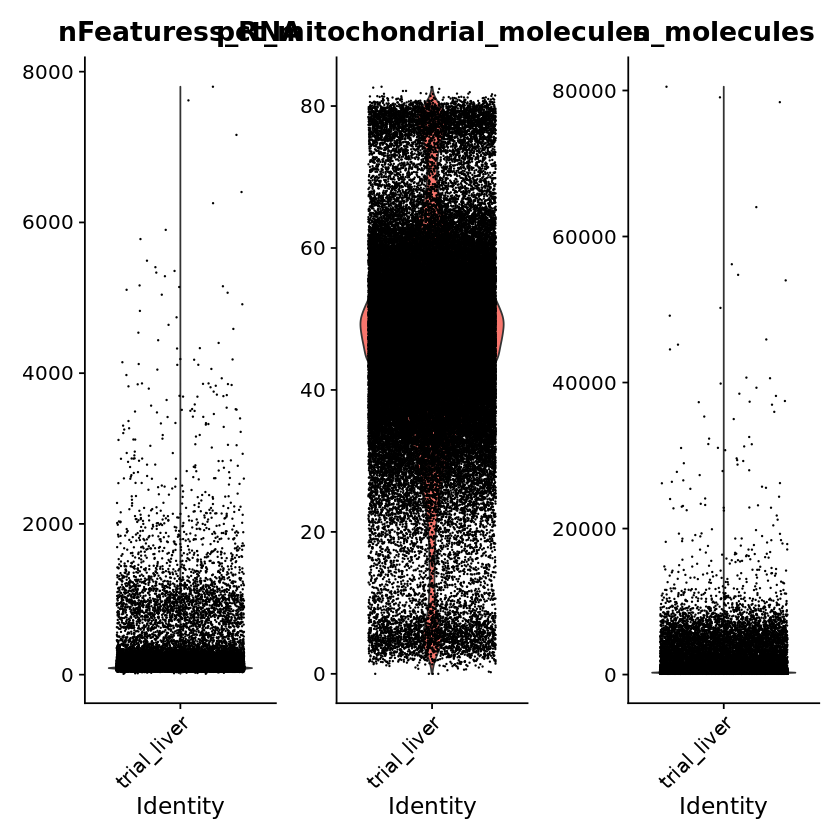

In [18]:
# Visualize QC metrics as a violin plot
VlnPlot(liver, features = c("nFeaturess_RNA", "pct_mitochondrial_molecules", "n_molecules"), ncol = 3)

In [20]:
liver <- subset(liver, subset = nFeaturess_RNA > 200 & nFeaturess_RNA < 2500 & pct_mitochondrial_molecules < 5)

In [21]:
liver <- NormalizeData(liver, normalization.method = "LogNormalize", scale.factor = 10000)


In [26]:
liver <- FindVariableFeatures(liver, selection.method = "vst", nfeatures = 1000)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.9835”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.50344”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.1561e-14”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”


In [27]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(liver), 10)
top10

[1] "HBD"    "CA1"    "HBM"    "AHSP"   "S100A8" "S100A9" "HBA2"   "CA2"   
 [9] "IGKC"   "HBA1"

In [28]:
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(liver)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1165 rows containing missing values (geom_point).”


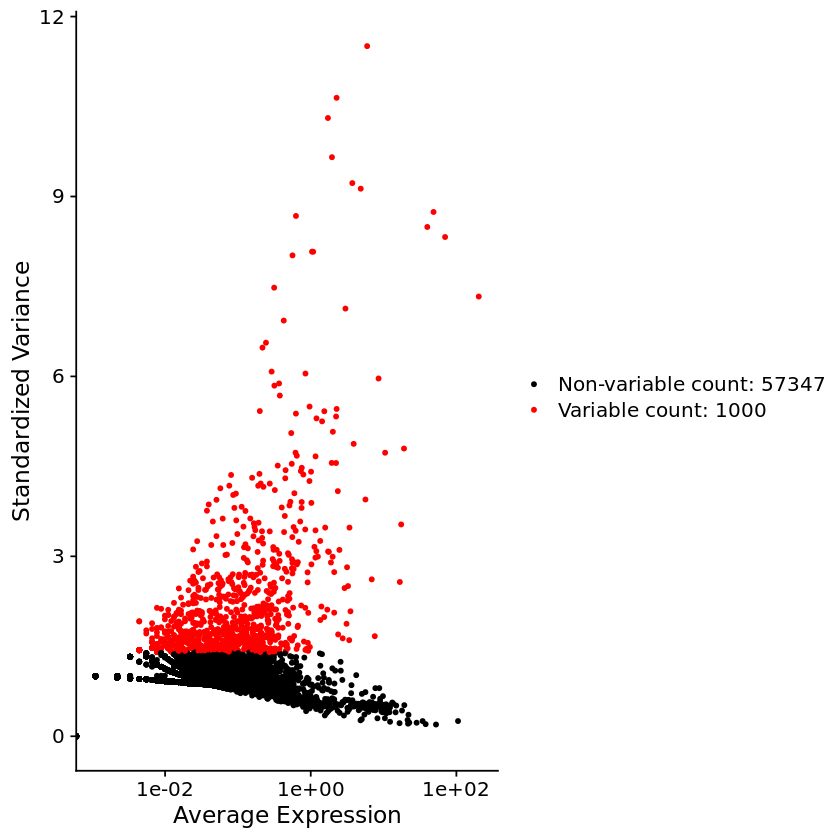

In [29]:
plot1

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1165 rows containing missing values (geom_point).”


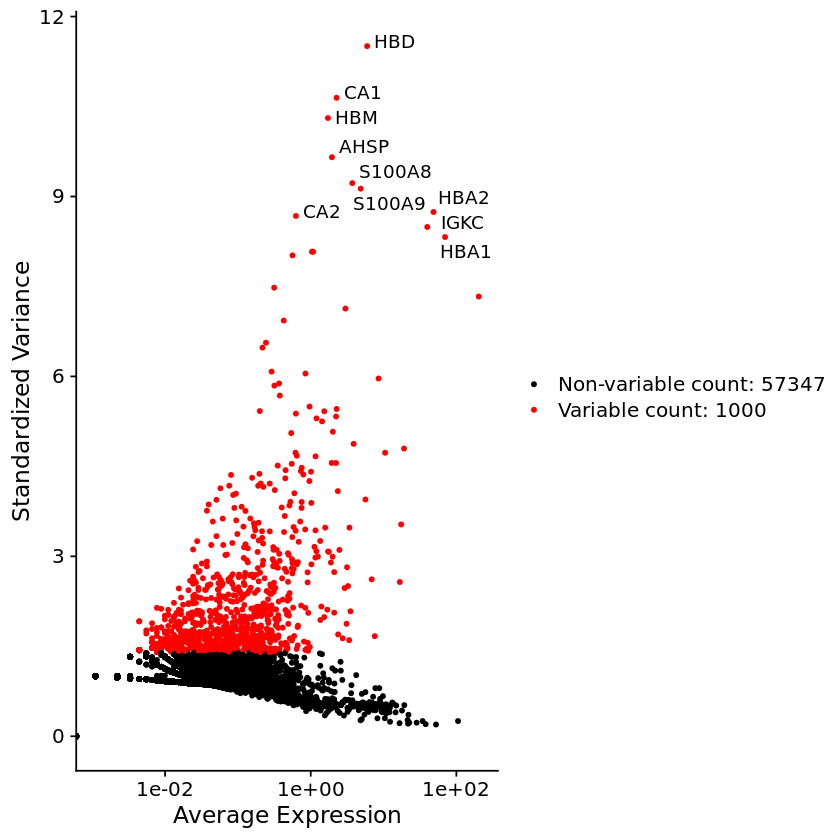

In [30]:
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

In [31]:
all.genes <- rownames(liver)
liver <- ScaleData(liver, features = all.genes)

Centering and scaling data matrix



In [32]:
liver <- RunPCA(liver, features = VariableFeatures(object = liver))

PC_ 1 
Positive:  ID3, TM4SF1, TFPI, HSPG2, IGFBP7, ID1, C7, PRSS23, ADIRF, APP 
	   IFI27, LIFR, NR2F2, RAMP3, IFITM3, PTPRB, TIMP3, TIMP1, IL33, TGM2 
	   CAVIN2, GNG11, SRPX, CALCRL, VWF, IL6ST, NPDC1, MYCT1, HES1, RNASE1 
Negative:  S100A4, CCL4, CD52, TYROBP, KLRB1, CCL3, FCER1G, UCP2, CMC1, AREG 
	   CCL3L3, GNLY, XCL2, RGS1, GZMH, LTB, HBB, RGS2, RNASET2, HBA2 
	   CCL4L2, LINC01871, ALAS2, IL7R, AHSP, SLC4A1, HBD, XCL1, CA1, HBM 
PC_ 2 
Positive:  SLC4A1, AHSP, GYPA, HBD, ALAS2, HBM, CA1, GYPB, RHCE, CA2 
	   SNCA, HEMGN, HBA2, HBA1, KLF1, EPB42, HBB, HMBS, SLC25A37, RHAG 
	   FECH, SLC25A39, TRIM58, TSPO2, RFESD, HBQ1, SLC2A1, RHD, MYL4, GYPE 
Negative:  AIF1, LYZ, AC020656.1, CTSS, LST1, CST3, CD163, CFD, S100A9, CLEC7A 
	   MAFB, FCN1, FTL, CSTA, VSIG4, VCAN, LGALS1, MNDA, GRN, CXCL8 
	   CSF3R, GPX1, TYROBP, S100A8, MS4A7, HLA-DRA, IGSF6, PSAP, S100A11, MPEG1 
PC_ 3 
Positive:  KLRB1, CMC1, CCL4, GNLY, FKBP11, XCL2, GZMH, LINC01871, LTB, XCL1 
	   IL7R, IFNG, TRGC2, FGFBP2,

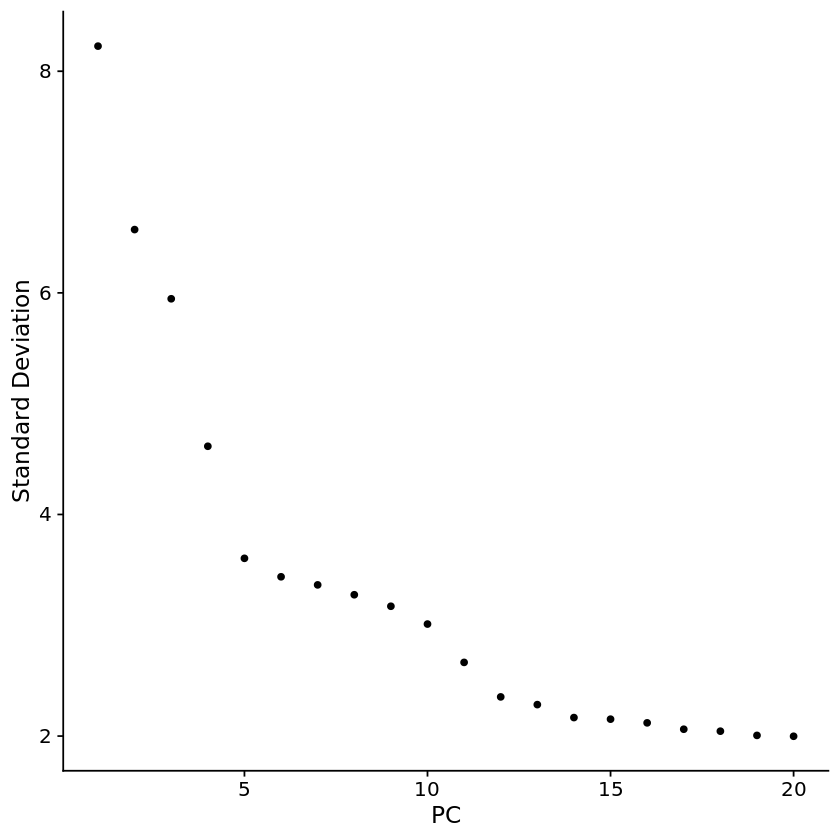

In [33]:
ElbowPlot(liver)

In [34]:
liver <- FindNeighbors(liver, dims = 1:10)
liver <- FindClusters(liver, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 906
Number of edges: 27164

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8533
Number of communities: 7
Elapsed time: 0 seconds


In [35]:
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
liver <- RunUMAP(liver, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:29:17 UMAP embedding parameters a = 0.9922 b = 1.112

21:29:17 Read 906 rows and found 10 numeric columns

21:29:17 Using Annoy for neighbor search, n_neighbors = 30

21:29:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:29:18 Writing NN index file to temp file /tmp/RtmpmX37Fq/file2b9aea751

21:29:18 Searching Annoy index using 1 thread, search_k = 3000

21:29:18 Annoy recall = 100%

21:29:18 Commencing smooth kNN distance calibration using 1 thread

21:29:19 Initializing from no

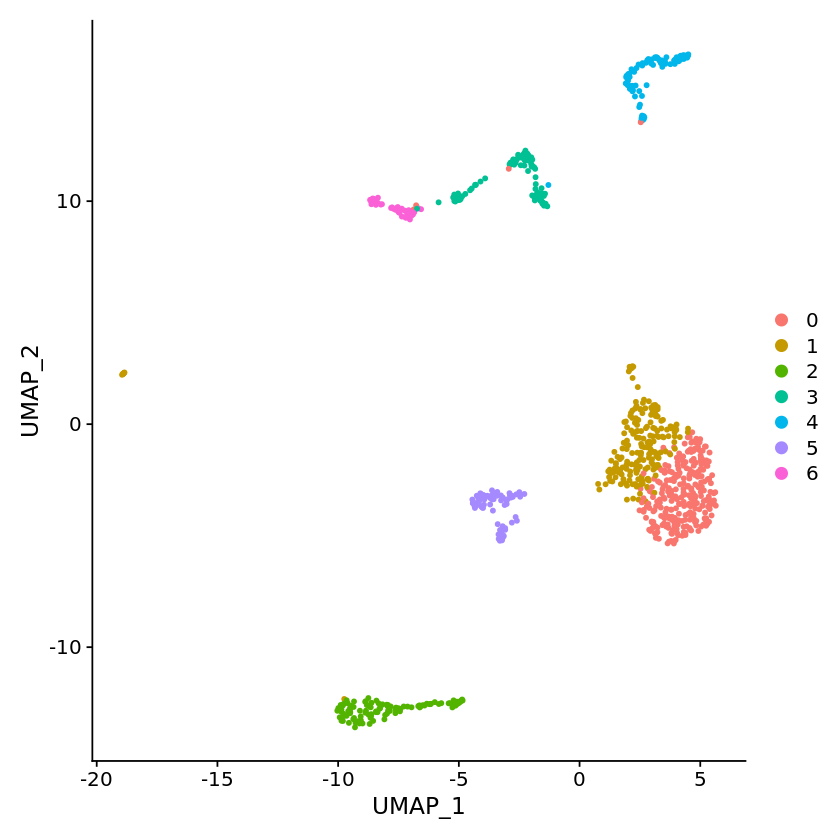

In [36]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(liver, reduction = "umap")

In [37]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(liver, ident.1 = 2, min.pct = 0.25)
head(cluster2.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AC020656.1,1.494248e-157,4.541742,0.947,0.024,8.718491e-153
AIF1,3.195190e-151,3.921206,0.965,0.039,1.864297e-146
LYZ,5.726295e-151,4.895742,0.982,0.043,3.341122e-146
CLEC7A,1.492917e-129,2.413686,0.690,0.001,8.710726e-125
LST1,4.391950e-125,2.800022,0.805,0.026,2.562571e-120


In [38]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
liver.markers <- FindAllMarkers(liver, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
liver.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.484750e-67,2.130880,0.858,0.364,2.033247e-62,0,NKG7
3.040195e-29,2.705629,0.396,0.099,1.773863e-24,0,GNLY
2.112089e-39,1.825726,0.403,0.052,1.232341e-34,1,IL7R
4.672854e-08,1.565510,0.995,0.960,2.726470e-03,1,SAA2
5.726295e-151,4.895742,0.982,0.043,3.341122e-146,2,LYZ
1.980800e-92,5.454039,0.903,0.130,1.155737e-87,2,S100A9
3.730262e-111,3.641319,0.787,0.034,2.176496e-106,3,SPARCL1
5.316891e-90,3.646359,0.670,0.032,3.102246e-85,3,MGP
7.198553e-58,8.307648,0.988,0.383,4.200140e-53,4,HBA1


In [1]:
# end